In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from PIL import Image, ImageFilter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Original image


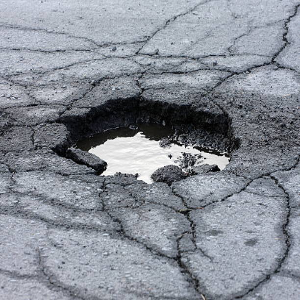

Gray-scale image


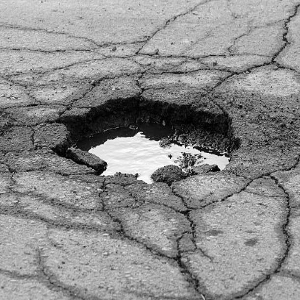

Median image


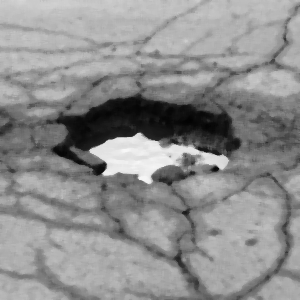

Enchanced image


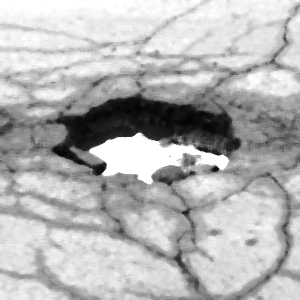

Histogram image


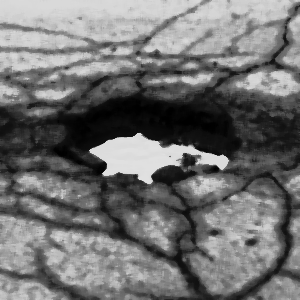

Sharpened image


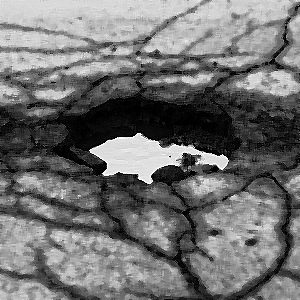

Threshold image


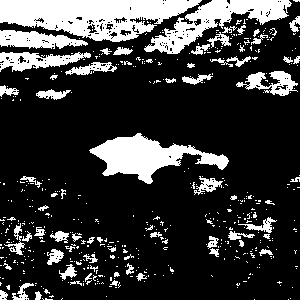

Original image


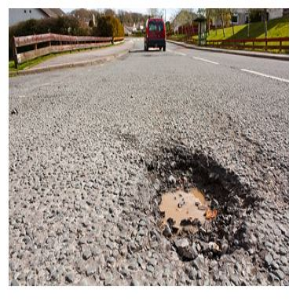

Gray-scale image


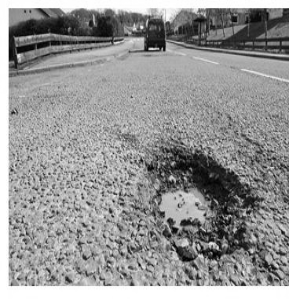

Median image


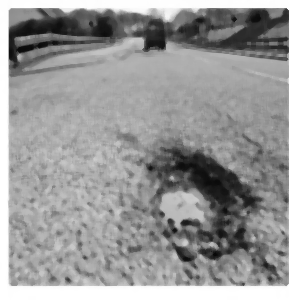

Enchanced image


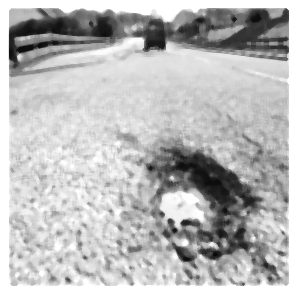

Histogram image


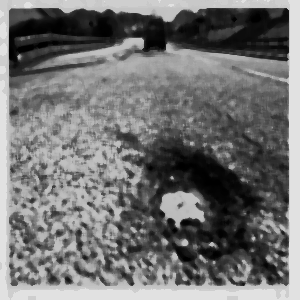

Sharpened image


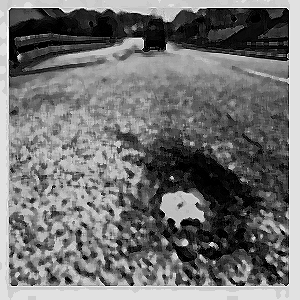

Threshold image


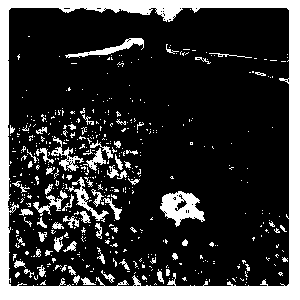

Original image


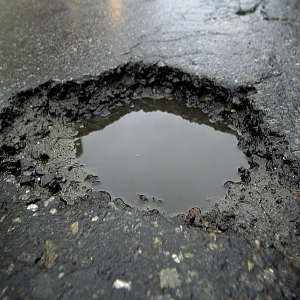

Gray-scale image


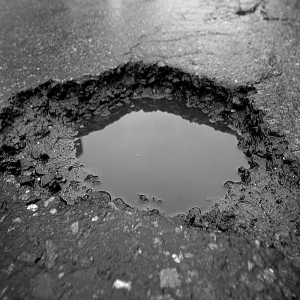

Median image


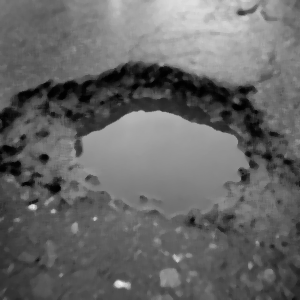

Enchanced image


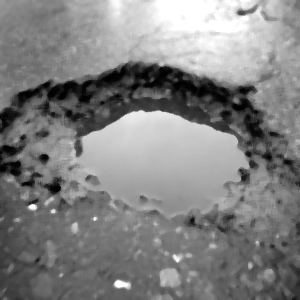

Histogram image


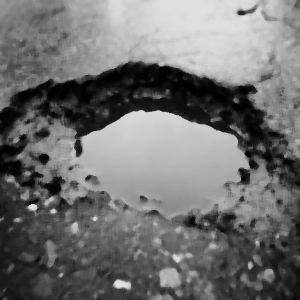

Sharpened image


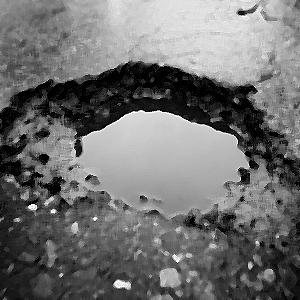

Threshold image


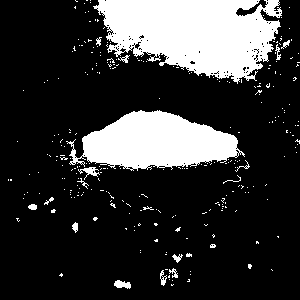

Original image


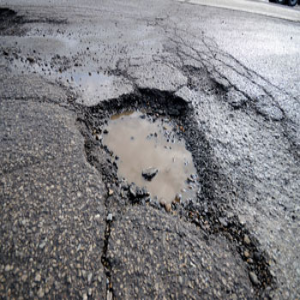

Gray-scale image


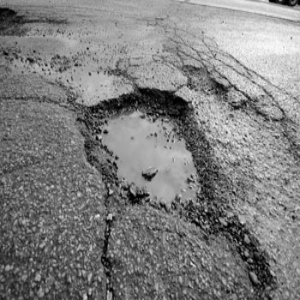

Median image


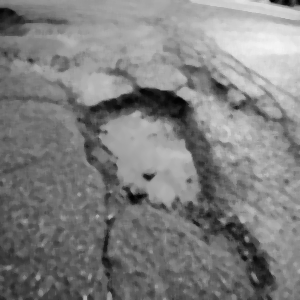

Enchanced image


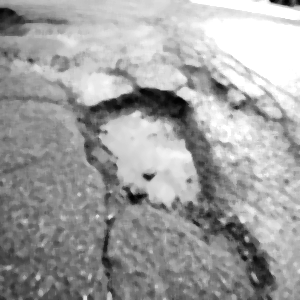

Histogram image


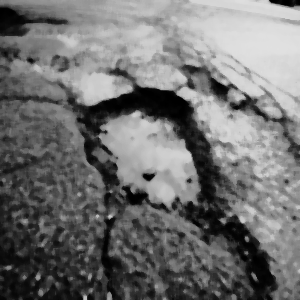

Sharpened image


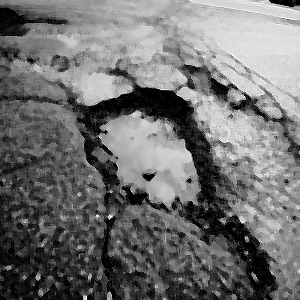

Threshold image


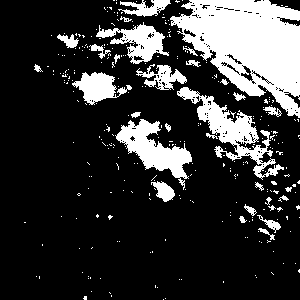

Original image


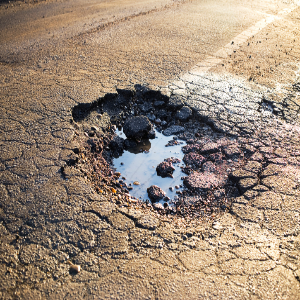

Gray-scale image


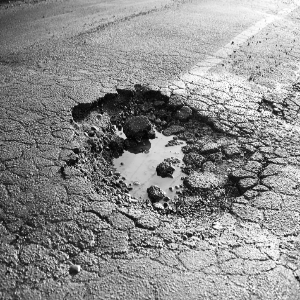

Median image


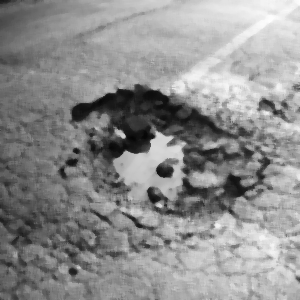

Enchanced image


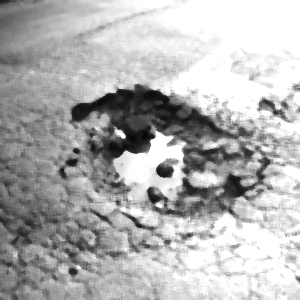

Histogram image


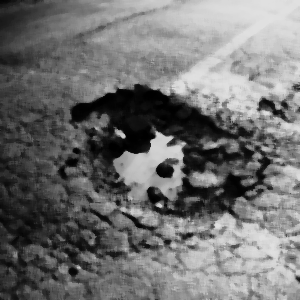

Sharpened image


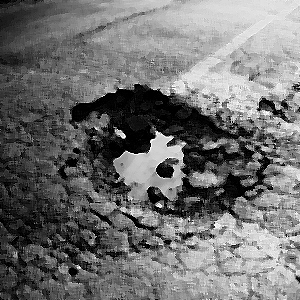

Threshold image


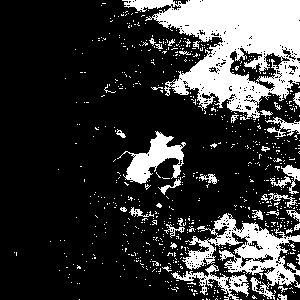

Original image


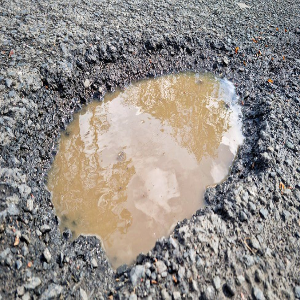

Gray-scale image


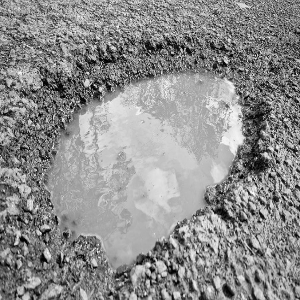

Median image


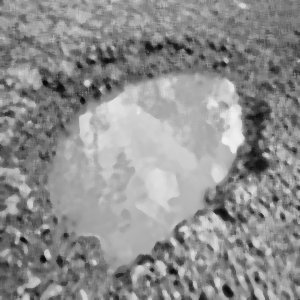

Enchanced image


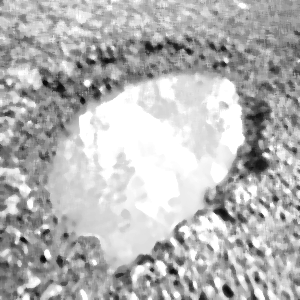

Histogram image


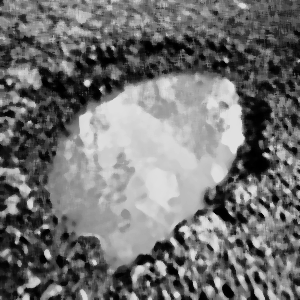

Sharpened image


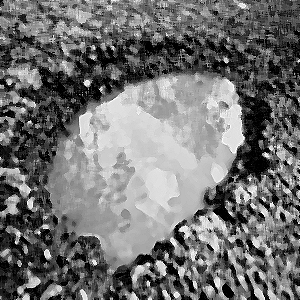

Threshold image


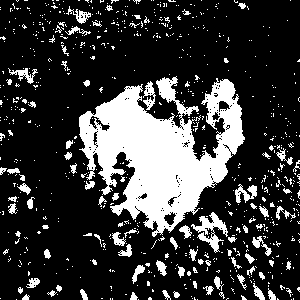

Original image


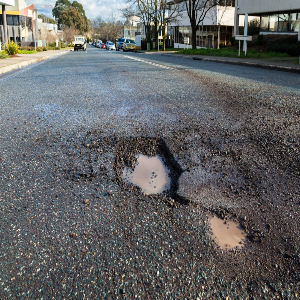

Gray-scale image


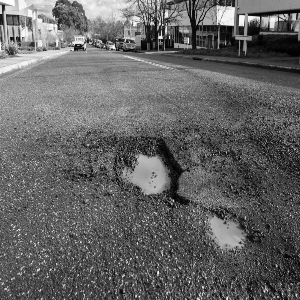

Median image


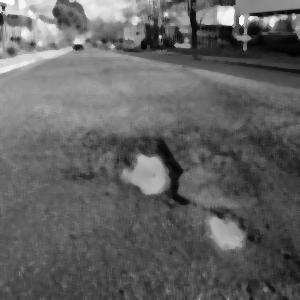

Enchanced image


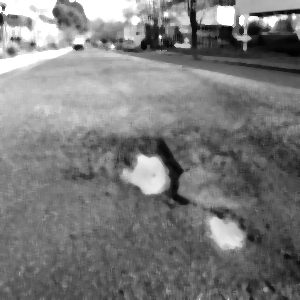

Histogram image


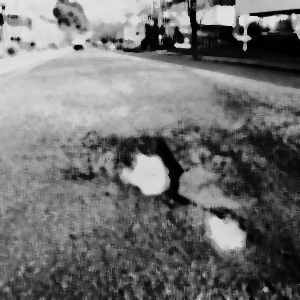

Sharpened image


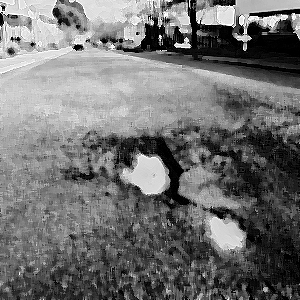

Threshold image


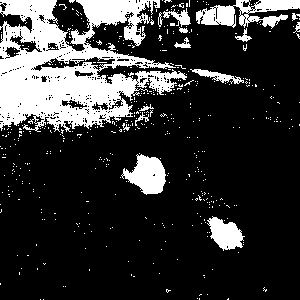

Original image


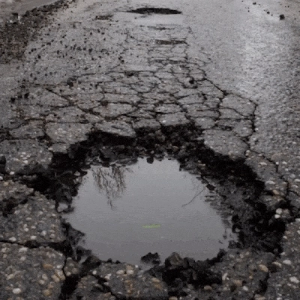

Gray-scale image


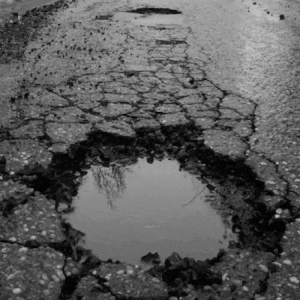

Median image


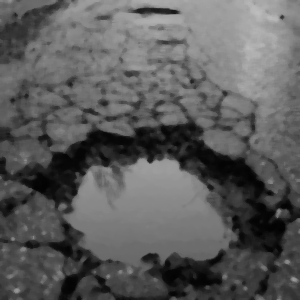

Enchanced image


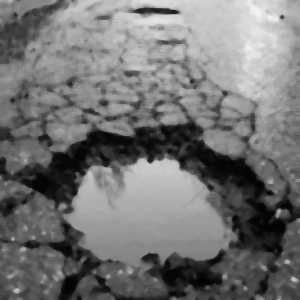

Histogram image


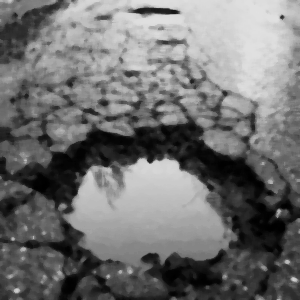

Sharpened image


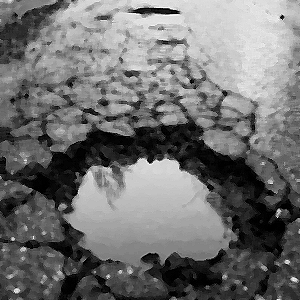

Threshold image


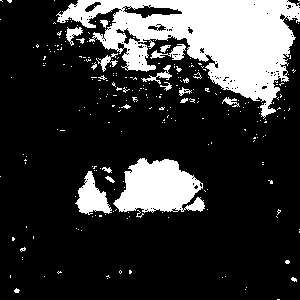

Original image


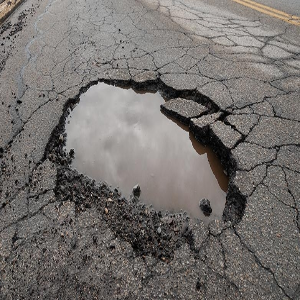

Gray-scale image


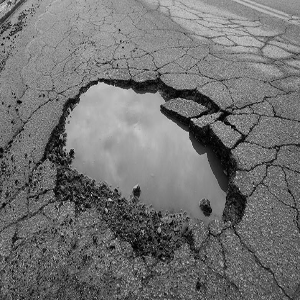

Median image


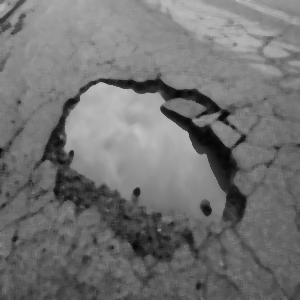

Enchanced image


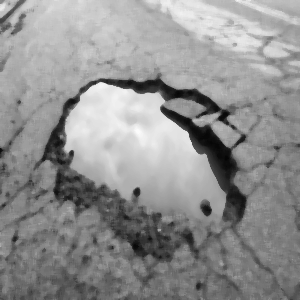

Histogram image


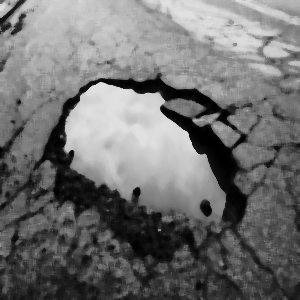

Sharpened image


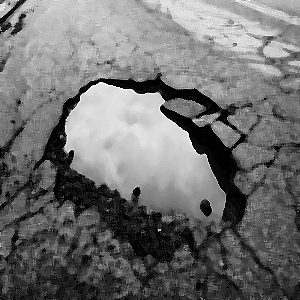

Threshold image


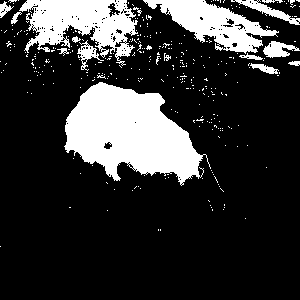

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import glob
import os
from matplotlib import pyplot as plt
from os import listdir
from scipy.ndimage.filters import median_filter
img_dir = "/content/drive/MyDrive/Potholes Dataset" # Enter Directory of all images  
data_path = os.path.join(img_dir,'*jpg') 
files = glob.glob(data_path)
for f1 in files:
    img = cv2.imread(f1)
    # resize image
    img = cv2.resize(img, (300, 300), interpolation = cv2.INTER_LINEAR)
    print("Original image")
    cv2_imshow(img)
    #gray scaling
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    print("Gray-scale image")
    cv2_imshow(gray_image)
    #median filtering
    med_image = median_filter(gray_image,5)
    print("Median image")
    cv2_imshow(med_image)
    #image enhancement using power law transformation
    im_power_law_transformation = 1*pow(med_image,1.05)
    print("Enchanced image")
    cv2_imshow(im_power_law_transformation)
    #histogram equalization
    hist,bins = np.histogram(med_image.flatten(),256,[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()
    cdf_m = np.ma.masked_equal(cdf,0)
    cdf_m = (cdf_m - cdf_m.min())*225/(cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m,0).astype('uint8')
    img2 = cdf[med_image]
    print("Histogram image")
    cv2_imshow(img2)
    #image sharpening
    lap = cv2.Laplacian(med_image,cv2.CV_64F)
    
    # Calculate the sharpened image
    sharp = img2 - 0.9*lap
    print("Sharpened image")
    cv2_imshow(sharp)
    #thresholding
    ret, thresh1 = cv2.threshold(sharp, 180, 255, cv2.THRESH_BINARY)
    print("Threshold image")
    cv2_imshow(thresh1)

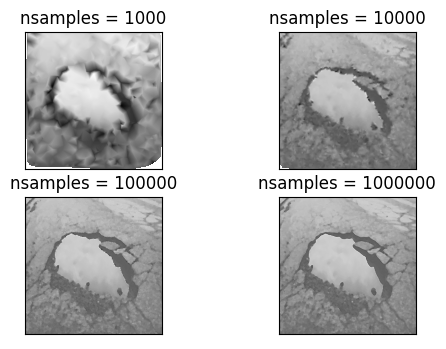

In [ ]:
#Interpolation by samples
import os
import sys
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
from PIL import Image
from numpy import asarray
def make_interpolated_image(nsamples):
    ix = np.random.randint(im.shape[1], size=nsamples)
    iy = np.random.randint(im.shape[0], size=nsamples)
    samples = im[iy,ix]
    int_im = griddata((iy, ix), samples, (Y, X)) #interpolation function returns the interpolated grid value
    return int_im

# Read in image and convert to greyscale array object
img_name = sys.argv[1]
img=cv2.imread('/content/drive/MyDrive/Pothole_dataset/6.jpg')
im =asarray(sharp)
# A meshgrid of pixel coordinates
nx, ny = im.shape[1], im.shape[0]
X, Y = np.meshgrid(np.arange(0, nx, 1), np.arange(0, ny, 1)) #convert to rectangular grid from two 1-d arrays

# Create a figure of nrows x ncols subplots, and orient it appropriately
# for the aspect ratio of the image.
nrows, ncols = 2, 2
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(6,4), dpi=100)
if nx < ny:
    w, h = fig.get_figwidth(), fig.get_figheight()
    fig.set_figwidth(h), fig.set_figheight(w)

# Convert an integer i to coordinates in the ax array
get_indices = lambda i: (i // nrows, i % ncols)

# Sample 100, 1,000, 10,000 and 100,000 points and plot the interpolated
# images in the figure
for i in range(4):
    nsamples = 10**(i+3)
    axes = ax[get_indices(i)]
    axes.imshow(make_interpolated_image(nsamples),cmap=plt.get_cmap('Greys_r'))
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title('nsamples = {0:d}'.format(nsamples))
filestem = os.path.splitext(os.path.basename(img_name))[0]
plt.savefig('{0:s}_interp.png'.format(filestem), dpi=100)